<a href="https://colab.research.google.com/github/MohammedGamil19/NLP_Analysis-TripAdvisor-Hotel-Reviews-Dataset-/blob/main/NLP_Analysis_TripAdvisor_Hotel_Reviews_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading and Displaying the TripAdvisor Hotel Reviews Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


- Display the first 5 rows using `df.head()` to understand the structure (columns: `Review`, `Rating`).


In [2]:
import pandas as pd

df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


from matplotlib import pyplot as plt
_df_23['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Rating', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### 🛠️ NLTK Setup for Text Preprocessing

- Download necessary NLTK resources: tokenizer, stopwords, lemmatizer, etc.
- Import tools for tokenization, stopword removal, stemming, and lemmatization.

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### 🧹 Preprocess Text Reviews
- Define `preprocess()` function
- Test the function on the first review in the dataset.

In [14]:

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in stop_words]
    stems = [stemmer.stem(t) for t in tokens]
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return {
        "original": text,
        "tokens": tokens,
        "stems": stems,
        "lemmas": lemmas
    }

# Apply to a sample (for testing)
sample = df['Review'][0]
preprocess(sample)


{'original': 'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
 'tokens': ['nice',
  'hotel',
  'expensive',
  'parking',
  'got',
  'good',
  'deal',
  'stay',
  'hotel',
  'anniversary',
  'arrived',
  'late',
  'evening',
  'took',
  'advice',
  'previous',
  'reviews',
  'valet',
  'parking',
  'check',
  'quick',
  'easy',
  'little',
  'disappointed',
  'non-existent',
  'view',
  'room',
  'room',
  'clean',
  'nice',
  'size',
  'bed',
  'co

### 📊 Add Processed Text and Token Counts

- Apply the `preprocess()` function to each review and store the lemmatized tokens.
- Calculate original token count and cleaned (lemmatized) token count.
- Display a preview with both counts.


In [15]:
df['processed'] = df['Review'].apply(lambda x: preprocess(x)['lemmas'])

In [17]:
df['token_count'] = df['Review'].apply(lambda x: len(word_tokenize(x)))
df['cleaned_count'] = df['processed'].apply(len)
df[['Review', 'token_count', 'cleaned_count']].head()


,Review,token_count,cleaned_count
0,nice hotel expensive parking got good deal sta...,98,81
1,ok nothing special charge diamond member hilto...,270,237
2,nice rooms not 4* experience hotel monaco seat...,236,211
3,"unique, great stay, wonderful time hotel monac...",102,86
4,"great stay great stay, went seahawk game aweso...",224,180


from matplotlib import pyplot as plt
_df_27['token_count'].plot(kind='hist', bins=20, title='token_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['cleaned_count'].plot(kind='hist', bins=20, title='cleaned_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='token_count', y='cleaned_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['token_count'].plot(kind='line', figsize=(8, 4), title='token_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['cleaned_count'].plot(kind='line', figsize=(8, 4), title='cleaned_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='token_count', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='cleaned_count', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### 📈 Visualize Token Counts (Before vs After Cleaning)

- Sample 5 reviews to simplify plots.
- Plot histograms of token counts before and after cleaning.
- Use scatter and line plots to compare original and cleaned token counts.
---


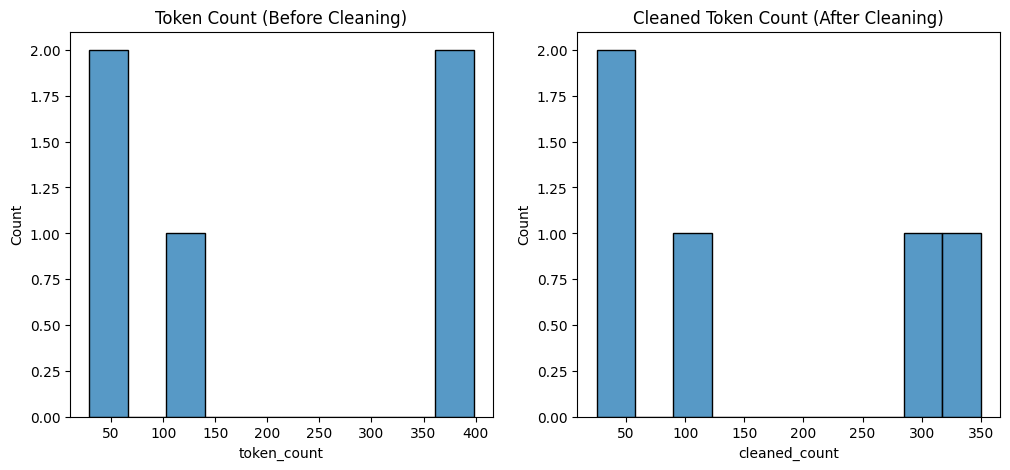

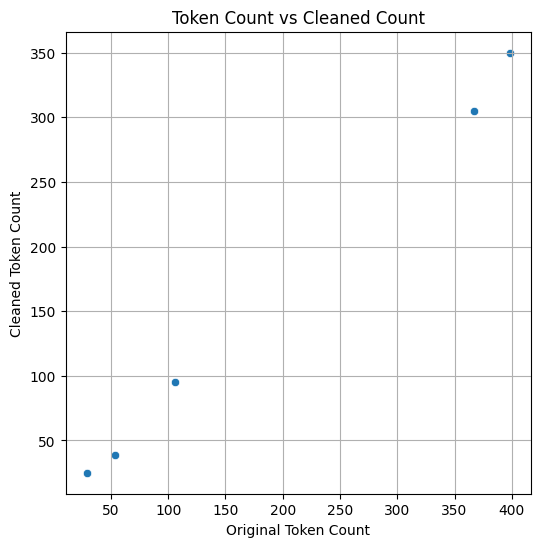

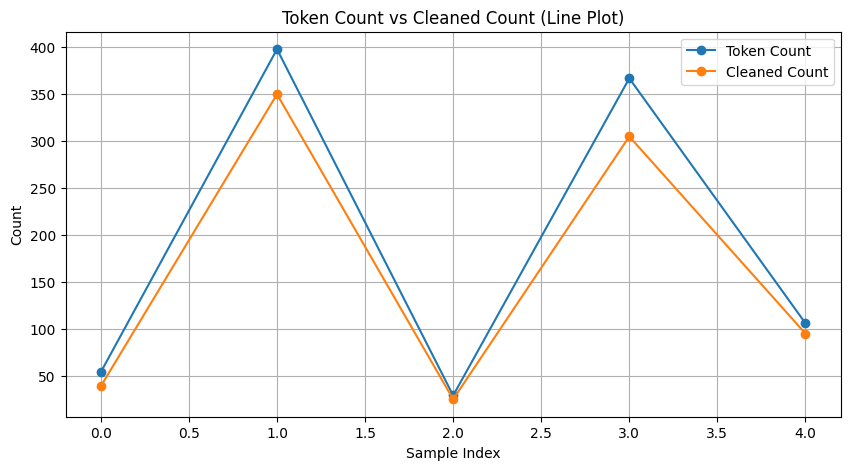

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 5 rows to keep visualization readable
sample_df = df[['token_count', 'cleaned_count']].sample(5, random_state=42)

# Histogram of token count before cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(sample_df['token_count'], bins=10)
plt.title('Token Count (Before Cleaning)')

# Histogram of token count after cleaning
plt.subplot(1, 2, 2)
sns.histplot(sample_df['cleaned_count'], bins=10)
plt.title('Cleaned Token Count (After Cleaning)')
plt.show()

# Scatter plot: token_count vs cleaned_count
plt.figure(figsize=(6, 6))
sns.scatterplot(x='token_count', y='cleaned_count', data=sample_df)
plt.title('Token Count vs Cleaned Count')
plt.xlabel('Original Token Count')
plt.ylabel('Cleaned Token Count')
plt.grid(True)
plt.show()

# Line plot comparison
plt.figure(figsize=(10, 5))
plt.plot(sample_df['token_count'].values, label='Token Count', marker='o')
plt.plot(sample_df['cleaned_count'].values, label='Cleaned Count', marker='o')
plt.title('Token Count vs Cleaned Count (Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


### 🧾 Create Bag-of-Words (BoW) Features

- Convert lemmatized tokens back to strings for vectorization.
- Use `CountVectorizer` to extract BoW features.
- Display first 10 feature names and BoW vector for one review.
----

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the lemmas back into a string for each document
df['processed_text'] = df['processed'].apply(lambda x: ' '.join(x))

# Now use the 'processed_text' column for CountVectorizer
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df['processed_text']) # Use the joined text

# Display feature names and vector for first sample
print("BoW Features (first 10):", bow_vectorizer.get_feature_names_out()[:10])
print("BoW Vector (sample 0):", bow_features[0].toarray())

BoW Features (first 10): ['00' '000' '0001' '000__çî_' '000hope' '000rp' '000rupiah' '000sf'
 '000us' '000year']
BoW Vector (sample 0): [[0 0 0 ... 0 0 0]]


###   Create TF-IDF Features

- Apply `TfidfVectorizer` to the cleaned text.
- Generate TF-IDF matrix to capture term importance.
- Show first 10 feature names and the TF-IDF vector of one sample.
---

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Change 'cleaned_text' to 'processed_text'
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

# Display top TF-IDF features
print("TF-IDF Features (first 10):", tfidf_vectorizer.get_feature_names_out()[:10])
print("TF-IDF Vector (sample 0):", tfidf_features[0].toarray())

TF-IDF Features (first 10): ['00' '000' '0001' '000__çî_' '000hope' '000rp' '000rupiah' '000sf'
 '000us' '000year']
TF-IDF Vector (sample 0): [[0. 0. 0. ... 0. 0. 0.]]


In [32]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [33]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling num

### Train Word2Vec Embeddings

- Preprocess reviews into lemmatized tokens.
- Use Gensim’s `Word2Vec` to train word embeddings:
  - `vector_size=100`: dimensionality of vectors
  - `window=5`: context window
  - `min_count=2`: ignore rare words
- `sentences` is a list of token lists used for training.
----

In [4]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Assuming the file name is 'tripadvisor_hotel_reviews.csv'
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function (same as you had before)
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in stop_words]
    # ... (rest of your preprocessing function)
    # Ensure the function returns the preprocessed data
    stems = [stemmer.stem(t) for t in tokens]
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return {
        "original": text,
        "tokens": tokens,
        "stems": stems,
        "lemmas": lemmas # Make sure this key is present
    }

# Apply preprocessing and create the 'processed' column
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['processed'] = df['Review'].apply(lambda x: preprocess(x)['lemmas'])

# Now proceed with Word2Vec
sentences = df['processed'].tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# ... (rest of your Word2Vec code)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 🧾 Word2Vec: Inspect Word Embeddings

- Train Word2Vec on cleaned review tokens.
- Check if the word "hotel" exists in the model.
- Print the first 10 values of its vector representation.
---

In [5]:
from gensim.models import Word2Vec

# Prepare input for Word2Vec: list of token lists
sentences = df['processed'].tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Example: vector for the word "hotel"
if "hotel" in w2v_model.wv:
    print("Word2Vec vector for 'hotel':", w2v_model.wv['hotel'][:10])  # First 10 values
else:
    print("Word 'hotel' not in vocabulary.")


Word2Vec vector for 'hotel': [-0.16179705  0.5310399   0.30965704  0.9498291   0.561033    0.06682111
  1.8539004  -0.8413139  -0.14558344 -0.07370214]


 ### t-SNE Visualization of Word2Vec Embeddings
- Select the top 100 most frequent words from the Word2Vec model.

- Extract their vector representations.

- Apply t-SNE to reduce dimensions to 2D.

- Plot the 2D word vectors with labels.
---

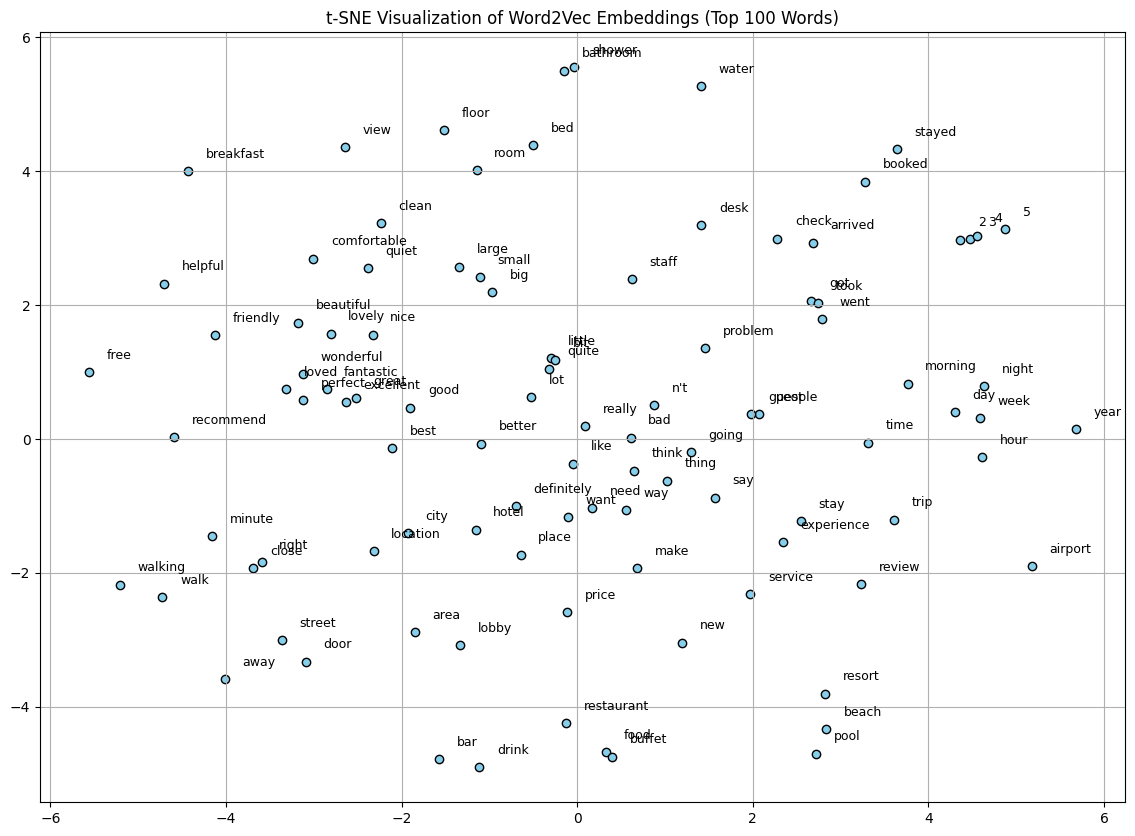

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Select 100 most frequent words in the model
words = list(w2v_model.wv.index_to_key[:100])
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vecs_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], edgecolors='k', c='skyblue')

for i, word in enumerate(words):
    plt.text(word_vecs_2d[i, 0]+0.2, word_vecs_2d[i, 1]+0.2, word, fontsize=9)

plt.title("t-SNE Visualization of Word2Vec Embeddings (Top 100 Words)")
plt.grid(True)
plt.show()


## Author
- Mohammed Al-Shujaa
- Dzakki Abdul-Jabbar